In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
#path = os.getcwd()
path = 'E:\\temp_data_dump\\PanNuke\\data\\zip\\Fold 3'

In [3]:
masks_path = os.path.join(path, 'masks', 'fold3')
os.listdir(masks_path)

['masks.npy']

In [4]:
msk_path = os.path.join(masks_path, os.listdir(masks_path)[0])
msk_path

'E:\\temp_data_dump\\PanNuke\\data\\zip\\Fold 3\\masks\\fold3\\masks.npy'

In [6]:
new_msk_save_path_f3 = 'E:\\temp_data_dump\\PanNuke\\data\\zip\\Fold 3\\masks'

In [7]:
masks = np.load(msk_path)

In [8]:
masks.dtype

dtype('float64')

In [9]:
masks.shape

(2722, 256, 256, 6)

In [15]:
for i in range(6):
    print(np.unique(masks[500, :, :, i]))

#[masks[0, 0, 0, i] for i in range(6)]

[  0.   6.   9.  12.  25.  32.  37.  40.  43.  49.  53.  55.  61.  64.
  73.  75.  79.  82.  86.  92.  94.  97.  98.  99. 109. 112. 113. 119.
 380. 381.]
[0.]
[0.]
[0.]
[0.]
[0. 1.]


In [16]:
for j in range(2656):
    print(masks[j, 0, 0, :])
    print([masks[j, 0, 0, i] for i in range(6)])
    print([np.unique(masks[j, :, 0:, i]) for i in range(6)])
    print('\n')

[0. 0. 0. 0. 0. 1.]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[array([  0.,   2.,   5.,   9.,  11.,  12.,  20.,  25.,  30.,  32., 160.]), array([ 0., 16.]), array([ 0., 44., 47.]), array([0.]), array([0.]), array([0., 1.])]


[0. 0. 0. 0. 0. 1.]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[array([  0.,  52.,  69.,  75., 158.]), array([0.]), array([ 0., 57., 59., 61., 84.]), array([0.]), array([0.]), array([0., 1.])]


[0. 0. 0. 0. 0. 1.]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[array([  0., 117., 125., 155.]), array([  0., 120.]), array([  0.,  88.,  96., 107., 108., 110., 122., 123.]), array([0.]), array([0.]), array([0., 1.])]


[0. 0. 0. 0. 0. 1.]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[array([  0.,  91.,  94.,  97.,  98., 105., 115., 118., 121., 124., 154.]), array([0.]), array([ 0., 93.]), array([0.]), array([0.]), array([0., 1.])]


[0. 0. 0. 0. 0. 1.]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[array([ 0.,  3., 10., 21., 26., 29., 35., 36., 39., 46.]), array([0., 2.]), array([0., 7.]), array([0.]), array([0.]), array([0., 1.])]




In [22]:
masks_samp = masks[0]
masks_samp[:,:,0][masks_samp[:,:,0]>0] = 0
masks_samp[:,:,1][masks_samp[:,:,1]>0] = 1
masks_samp[:,:,2][masks_samp[:,:,2]>0] = 2
masks_samp[:,:,3][masks_samp[:,:,3]>0] = 3
masks_samp[:,:,4][masks_samp[:,:,4]>0] = 4
masks_samp[:,:,5][masks_samp[:,:,5]>0] = 5

masks_samp2 = masks_samp.sum(axis=2)
np.unique(masks_samp2)

array([0., 1., 2., 5.])

In [23]:
masks_samp2.shape

(256, 256)

In [12]:
[np.unique(masks_samp[:, :, i]) for i in range(6)]

[array([0.]),
 array([0., 1.]),
 array([0., 2.]),
 array([0.]),
 array([0.]),
 array([0., 5.])]

In [13]:
masks_samp_s = masks_samp.sum(axis = 2)

In [14]:
np.unique(masks_samp_s)

array([0., 1., 2., 5.])

In [15]:
masks_samp_s[masks_samp_s>5]

array([], dtype=float64)

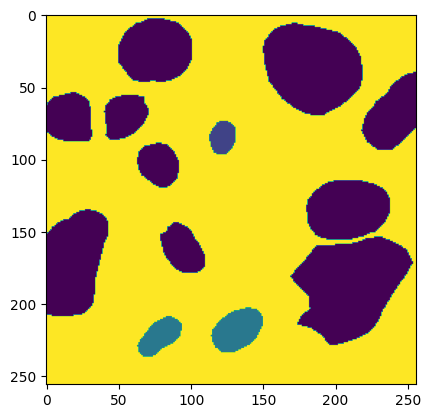

In [16]:
plt.imshow(np.uint8(masks_samp_s))
plt.show()

For every mask we join the 6 dimensions into one. Pixel with more than one value (>5) are transformed to 0

In [17]:
j=0
for i in masks:
    i[:,:,0][i[:,:,0]>0] = 0 #Neoplastic
    i[:,:,1][i[:,:,1]>0] = 1 #Limfo
    i[:,:,2][i[:,:,2]>0] = 2 #Connective
    i[:,:,3][i[:,:,3]>0] = 3 #Dead
    i[:,:,4][i[:,:,4]>0] = 4 #Epithelia
    i[:,:,5][i[:,:,5]>0] = 5 #Void
    #QC just in case there are weird values
    i[:,:,0][i[:,:,0]<0] = 0 #Neoplastic
    i[:,:,1][i[:,:,1]<0] = 0 #Limfo
    i[:,:,2][i[:,:,2]<0] = 0 #Connective
    i[:,:,3][i[:,:,3]<0] = 0 #Dead
    i[:,:,4][i[:,:,4]<0] = 0 #Epithelia
    i[:,:,5][i[:,:,5]<0] = 0 #Void
    i_2 = i.sum(axis=2)
    #Remve >5 values
    i_2[i_2>5] = 0
    im = Image.fromarray(np.uint8(i_2))
    im.save(f'{new_msk_save_path_f3}\\{j}.png')
    j+=1

In [18]:
new_msk_save_path_f3

'E:\\Dissertation\\PanNuke\\Data\\fold3\\masks'

In [19]:
try_im = Image.open(f'{new_msk_save_path_f3}\\{50}.png')

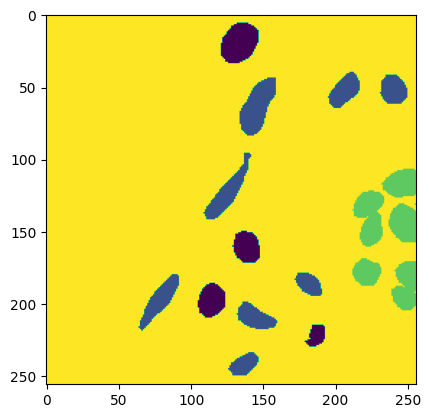

In [20]:
plt.imshow(try_im)
plt.show()